In [107]:
import pandas as pd
import numpy as np
import re
import dateparser
from collections import Counter
import matplotlib.pyplot as plt
plt.style.use('ggplot') 

from datetime import timedelta  

# text analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import string
import unidecode
import random
import torch

ModuleNotFoundError: No module named 'unidecode'

In [108]:
!pip install unidecode

You should consider upgrading via the 'C:\Users\baban\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [68]:
def read_file(file):
    '''Reads Whatsapp text file into a list of strings''' 
    
    x = open(file,'r', encoding = 'utf-8') #Opens the text file into variable x but the variable cannot be explored yet
    y = x.read() #By now it becomes a huge chunk of string that we need to separate line by line
    content = y.splitlines() #The splitline method converts the chunk of string into a list of strings
    return content 

In [69]:
chat = read_file('Chat.txt')
len(chat) 

1135

In [70]:
# join = [line for line in chat if  "This message was deleted" in line]
# join

In [71]:
 #Remove new lines
chat = [line.strip() for line in chat]
print("length of chat is:")
print(len(chat))

length of chat is:
1135


In [72]:
#Clean out the join notification lines
clean_chat = [line for line in chat if not "<Media omitted>" in line]

In [73]:
#Further cleaning
#Remove empty lines
clean_chat = [line for line in clean_chat if len(line) > 1]
print("length of clean_chat is:")
print(len(clean_chat)) 

length of clean_chat is:
1010


In [74]:
#Merge messages that belong together
msgs = [] #message container
pos = 0 #counter for position of msgs in the container
"""
Flow:
For every line, see if it matches the expression which is starting with the format "number(s)+slash" eg "12/"
If it does, it is a new line of conversion as they begin with dates, add it to msgs container
Else, it is a continuation of the previous line, add it to the previous line and append to msgs, then pop previous line.
"""
for line in clean_chat:
    if re.findall("\A\d+[/]", line):
        msgs.append(line)
        pos += 1
    else:
        take = msgs[pos-1] + ". " + line
        msgs.append(take)
        msgs.pop(pos-1)
len(msgs) 

886

In [75]:
time = [msgs[i].split(',')[1].split('-')[0] for i in range(len(msgs))]
time = [s.strip(' ') for s in time] # Remove spacing

In [76]:
date = [msgs[i].split(',')[0] for i in range(len(msgs))]

In [77]:
name = [msgs[i].split('-')[1].split(':')[0] for i in range(len(msgs))]

In [78]:
content = []
for i in range(len(msgs)):
  try:
    content.append(msgs[i].split(':')[2])
  except IndexError:
    content.append('Missing Text')

In [79]:
df = pd.DataFrame(list(zip(date, time, name, content)), columns = ['Date', 'Time', 'Name', 'Content'])
df 

,Date,Time,Name,Content
0,12/7/18,13:55,Messages and calls are end,Missing Text
1,12/11/18,07:06,Sidharth Sharma,This message was deleted
2,12/14/18,08:39,Ajinkya Moris,This message was deleted
3,12/14/18,10:24,Prasad Sonawane,This message was deleted
4,12/15/18,07:10,Bhushan Tayade,This message was deleted
...,...,...,...,...
881,8/20/20,02:38,Chinu,Japan and India servers
882,8/20/20,03:26,Gaurav,Chill maaro BC
883,8/20/20,03:26,Gaurav,Chillum toh hai na
884,8/20/20,03:26,Gaurav,Nai


In [80]:
df = df[df["Content"]!='Missing Text']
df.reset_index(inplace=True, drop=True)
df

,Date,Time,Name,Content
0,12/11/18,07:06,Sidharth Sharma,This message was deleted
1,12/14/18,08:39,Ajinkya Moris,This message was deleted
2,12/14/18,10:24,Prasad Sonawane,This message was deleted
3,12/15/18,07:10,Bhushan Tayade,This message was deleted
4,12/21/18,21:32,Bhushan Tayade,This message was deleted
...,...,...,...,...
876,8/20/20,02:38,Chinu,Japan and India servers
877,8/20/20,03:26,Gaurav,Chill maaro BC
878,8/20/20,03:26,Gaurav,Chillum toh hai na
879,8/20/20,03:26,Gaurav,Nai


In [81]:
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

df['DateTime'] = df['DateTime'].apply(lambda x: x+ timedelta(seconds=41400))

C:\Users\baban\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\baban\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [82]:
df['Hour'] = df['DateTime'].apply(lambda x:x.hour)

C:\Users\baban\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [83]:
df['weekday'] = df['DateTime'].apply(lambda x: x.day_name()) 

C:\Users\baban\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [84]:
df.head()

,Date,Time,Name,Content,DateTime,Hour,weekday
0,12/11/18,07:06,Sidharth Sharma,This message was deleted,2018-12-11 18:36:00,18,Tuesday
1,12/14/18,08:39,Ajinkya Moris,This message was deleted,2018-12-14 20:09:00,20,Friday
2,12/14/18,10:24,Prasad Sonawane,This message was deleted,2018-12-14 21:54:00,21,Friday
3,12/15/18,07:10,Bhushan Tayade,This message was deleted,2018-12-15 18:40:00,18,Saturday
4,12/21/18,21:32,Bhushan Tayade,This message was deleted,2018-12-22 09:02:00,9,Saturday


In [85]:
df['Letter_Count'] = df['Content'].apply(lambda s : len(s))
df['Word_Count'] = df['Content'].apply(lambda s : len(s.split(' ')))

C:\Users\baban\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\baban\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [86]:
#print first five rows of our dataframe

# drop column 
df.head()

,Date,Time,Name,Content,DateTime,Hour,weekday,Letter_Count,Word_Count
0,12/11/18,07:06,Sidharth Sharma,This message was deleted,2018-12-11 18:36:00,18,Tuesday,25,5
1,12/14/18,08:39,Ajinkya Moris,This message was deleted,2018-12-14 20:09:00,20,Friday,25,5
2,12/14/18,10:24,Prasad Sonawane,This message was deleted,2018-12-14 21:54:00,21,Friday,25,5
3,12/15/18,07:10,Bhushan Tayade,This message was deleted,2018-12-15 18:40:00,18,Saturday,25,5
4,12/21/18,21:32,Bhushan Tayade,This message was deleted,2018-12-22 09:02:00,9,Saturday,25,5


In [87]:
#saving to csv format
df.to_csv("WhatsappChat.csv") 

# Data Analysis

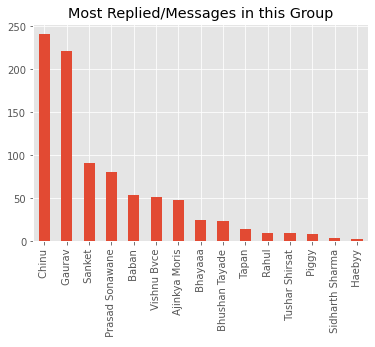

In [88]:
# most replied 

df['Name'].value_counts().plot.bar(title="Most Replied/Messages in this Group")

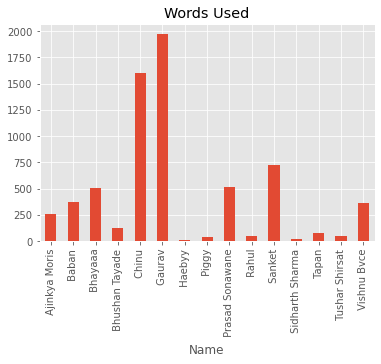

In [89]:
# most words 
df.groupby(['Name']).Word_Count.sum().plot.bar(title="Words Used")

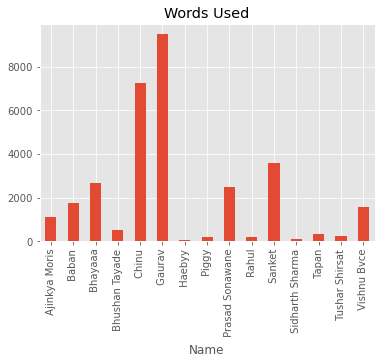

In [90]:
# letter count by users 
df.groupby(['Name']).Letter_Count.sum().plot.bar(title="Words Used")

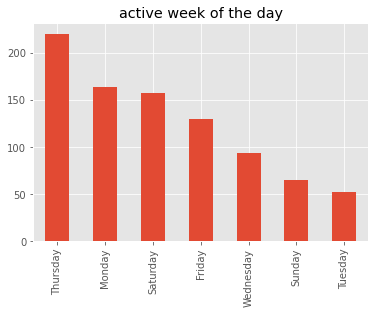

In [91]:
# week of the day active 

df['weekday'].value_counts().plot.bar(title="active week of the day")

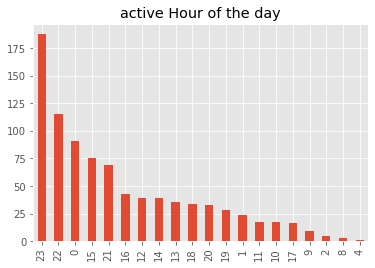

In [92]:
# what hour is most active

df['Hour'].value_counts().plot.bar(title="active Hour of the day")

In [109]:
# words per message  counter 

df_demo = df 


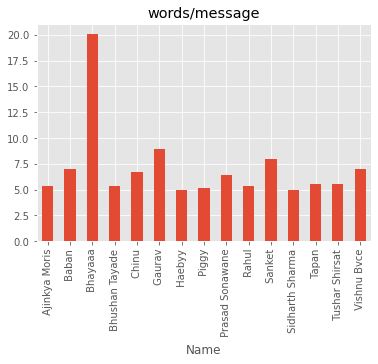

In [121]:

df_demo.groupby(['Name']).Word_Count.mean().plot.bar(title="words/message")

In [132]:
t = df[df['Word_Count']<358]

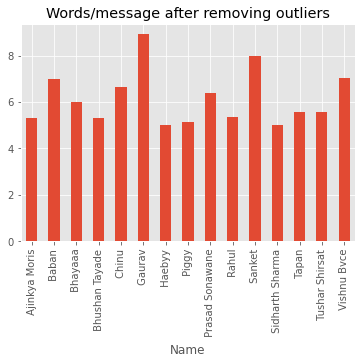

In [139]:
t.groupby(['Name']).Word_Count.mean().plot.bar(title='Words/message after removing outliers')